In [2]:
import gensim
import spacy
from collections import defaultdict
import pathlib
nlp = spacy.load('en_core_web_md')
import numpy as np

In [3]:
#Adding the documents from sci.space topic
corpus1 = []
for path in pathlib.Path("20news-bydate/20news-bydate-train/alt.atheism").iterdir():
    if path.is_file():
        current_file = open(path, "r",  encoding = "ISO-8859-1")
        corpus1.append(current_file.read())
        current_file.close()
        

In [4]:
#Adding the documents from talk.politics topic
corpus2 = []
for path in pathlib.Path("20news-bydate/20news-bydate-train/rec.sport.baseball").iterdir():
    if path.is_file():
        current_file = open(path, "r", encoding = "ISO-8859-1")
        corpus2.append(current_file.read())
        current_file.close()

In [5]:
#Adding the documents from rec.autos document
corpus3 = []
for path in pathlib.Path("20news-bydate/20news-bydate-train/sci.electronics").iterdir():
    if path.is_file():
        current_file = open(path, "r", encoding = "ISO-8859-1")
        corpus3.append(current_file.read())
        current_file.close()

corpus4 = []
for path in pathlib.Path("20news-bydate/20news-bydate-train/sci.med").iterdir():
    if path.is_file():
        current_file = open(path, "r", encoding = "ISO-8859-1")
        corpus4.append(current_file.read())
        current_file.close()



In [6]:
#Methods to clean documents, remove stopwords, numerical values, punctuation
from nltk.corpus import stopwords
def keep_token(t):
    return (t.is_alpha and 
            not (t.is_space or t.is_punct or 
                 t.is_stop or t.like_num))

def lemmatize_doc(doc):
    return [t.lemma_ for t in doc if keep_token(t)]

def lower(doc):
    return [t.lower() for t in doc]

In [7]:

#Cleaning all of the documents in each topic
corpus1 = [lemmatize_doc(nlp(doc)) for doc in corpus1]
corpus2 = [lemmatize_doc(nlp(doc)) for doc in corpus2]
corpus3 = [lemmatize_doc(nlp(doc)) for doc in corpus3]
corpus4 = [lemmatize_doc(nlp(doc)) for doc in corpus4]
corpus1 = [lower(doc) for doc in corpus1]
corpus2 = [lower(doc) for doc in corpus2]
corpus3 = [lower(doc) for doc in corpus3]
corpus4 = [lower(doc) for doc in corpus4]

In [8]:

from gensim.models import TfidfModel
from gensim.corpora import Dictionary

[['robert', 'knowles', 'subject', 'koresh', 'god', 'reply', 'nntp', 'posting', 'host', 'organization', 'kupajava', 'east', 'krakatoa', 'x', 'mailer', 'psilink', 'dos', 'line', 'date', 'fri', 'apr', 'mathew', 'late', 'news', 'koresh', 'finish', 'write', 'sequel', 'bible', 'mathew', 'write', 'seals', 'line', 'write', 'page', 'hand', 'assistant', 'proofreading', 'expect', 'decent', 'messiah', 'build', 'spellchecker', 'maybe', 'koresh', 'come'], ['aario', 'sami', 'subject', 'note', 'bobby', 'organization', 'tampere', 'university', 'technology', 'computing', 'centre', 'line', 'distribution', 'sfnet', 'nntp', 'posting', 'host', 'mozumder', 'write', 'insult', 'atheistic', 'genocide', 'totally', 'unintentional', 'atheism', 'happen', 'good', 'bad', 'include', 'genocide', 'know', 'conveniently', 'define', 'theist', 'wrong', 'define', 'people', 'wrong', 'atheist', 'statement', 'circular', 'mention', 'bigote', 'value', 'sami', 'aario', 'measure', 'atom', 'explode', 'sunlight', 'comprise', 'atom', 

In [16]:
#Adding all documents into one big corpus list
new_corpus1 = []
for doc in corpus1:
    new_corpus1.append(doc)
    
for doc in corpus2:
    new_corpus1.append(doc)
    
for doc in corpus3:
    new_corpus1.append(doc)
    
for doc in corpus4:
    new_corpus1.append(doc)
#Filtering out words that are too common or infrequent across all documents
docs_dict = Dictionary(new_corpus1)
docs_dict.filter_extremes(no_below=10, no_above=0.4)
for i in range(0, len(docs_dict)):
    print(docs_dict[i])
#Creating a bag-of-wrds model from all of the documents within the corpus
bag_of_words = [docs_dict.doc2bow(line) for line in new_corpus1]
model = TfidfModel(bag_of_words) 

#Adding the tf-idf results of the words in each document into a list
vector = []
for doc in bag_of_words:
    vector.append(model[doc])

apr
assistant
bible
build
come
date
decent
do
east
expect
finish
fri
god
hand
knowles
koresh
late
mailer
mathew
maybe
news
page
psilink
reply
robert
x
agree
atheism
atheist
bad
bobby
centre
circular
comprise
computing
define
disclaimer
distribution
explode
genocide
good
happen
include
insult
know
measure
mention
mind
mozumder
note
outer
people
plan
space
statement
stupid
technology
theist
totally
university
value
wrong
brian
care
college
counter
dating
dispute
earth
example
eye
file
fine
go
gospel
keith
maryland
matter
mean
miss
ok
park
post
prove
right
ryan
say
sig
state
tomorrow
west
will
word
allan
america
belief
bill
bit
california
count
cruel
describe
dictionary
english
fact
grief
hold
injury
institute
intent
jon
lack
lift
like
livesey
look
lot
pasadena
political
punishment
rest
schneider
spend
sufficient
sure
time
unusual
way
widely
bissell
book
central
christian
christianity
dan
destroy
ed
effort
folk
gmt
lawrence
liar
little
lunatic
make
na
process
read
real
save
sense
start
th

In [17]:
from gensim.models import Word2Vec

In [18]:
#Running word2vec to get word embeddings for each word in each of the documents
word2vec = Word2Vec(new_corpus1, window = 6, min_count=5, iter=1000, size = 300)
vocabulary = word2vec.wv.vocab

In [19]:
print(word2vec.most_similar('berkeley'))

[('indiana', 0.39069125056266785), ('southern', 0.3592306971549988), ('supersede', 0.35357052087783813), ('amy', 0.34889358282089233), ('angeles', 0.34754183888435364), ('princeton', 0.34136271476745605), ('delaware', 0.33134356141090393), ('baff', 0.3059057295322418), ('erythromycin', 0.3049100339412689), ('karlin', 0.3030353784561157)]


/Users/sanketmanjesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [20]:
#Creating weighted tf-idf word embeddings for each word in each document and averaging the word embeddings for each
#document to create an overall document embedding
embed_tfidf = np.array([])
out_count = 0
for vec in vector:
    sum_vec = np.array([])
    count_vals = 0
    for (id_num, val) in vec:
        if docs_dict[id_num] in word2vec:
            weighted_val = np.array([])
            #Creating weighted tf-idf word embeddings by multiplying each word embedding vector with the word's tf-idf
            #value
            if val > 0.1:
                print(docs_dict[id_num], val)
            weighted_val = np.append(weighted_val, val * np.array(word2vec[docs_dict[id_num]]))
            if count_vals is 0:
                sum_vec = np.append(sum_vec, weighted_val)
            else:
                sum_vec += weighted_val
            count_vals += 1
    #Averaging the word embeddings in each document to create an overall document embedding
    doc_avg = sum_vec / count_vals
    if out_count is 0:
        embed_tfidf = np.array([doc_avg])
    else:
        embed_tfidf = np.append(embed_tfidf, np.array([doc_avg]), axis=0)
    out_count += 1

/Users/sanketmanjesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':
/Users/sanketmanjesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


apr 0.12047192073002073
assistant 0.22178444278190337
bible 0.1452110291352148
build 0.11238789799092212
date 0.1332852247878753
decent 0.16938281700488253
do 0.20255709987045706
east 0.13620853413930806
expect 0.13011941962059548
finish 0.16211407116745888
fri 0.17822827179125592
god 0.10090224172588973
hand 0.1138234461383041
knowles 0.20255709987045706
koresh 0.5865806721326963
late 0.13775245036157463
mailer 0.20801972550923126
mathew 0.34107051455898163
maybe 0.10785262856871468
news 0.12081714576902541
page 0.1717211062324333
psilink 0.22178444278190337
robert 0.11324316797853386
agree 0.10154481044198707
atheism 0.12779802146949143
bobby 0.13616941905423582
centre 0.1738090496930998
circular 0.20338861855517815
comprise 0.20338861855517815
computing 0.1314738299303145
define 0.25970838708620164
disclaimer 0.12095809160728997
explode 0.18817729110823228
genocide 0.33225206759816994
insult 0.19654868869297668
measure 0.1303863407569136
mention 0.10602569295118958
mind 0.1068751424

south 0.2486171422708844
teach 0.1359683063555467
do 0.1112654579266707
knowles 0.1112654579266707
mailer 0.11426610092347947
psilink 0.12182711740502711
mention 0.1270160015331406
book 0.1176631322061631
holy 0.3258561096786932
quote 0.15493333870553516
science 0.29642776959219413
creation 0.10990313523002074
arabia 0.11968536019023783
islam 0.3190600904745534
pretty 0.11400296875109873
khan 0.10625110046829536
unique 0.11968536019023783
awful 0.10861870322623107
film 0.11773008904481676
finding 0.10990313523002074
impressed 0.22543146317288282
passage 0.11426610092347947
predictions 0.11593141395047718
scientific 0.151335988516856
topic 0.28102717958511714
genocide 0.2052310571438114
belief 0.15788087181321547
absolute 0.2982423629248868
mom 0.11623652085533019
religion 0.3020041824898001
christ 0.12342385282005958
freedom 0.10534495731806666
benedikt 0.18259750765880448
braunschweig 0.1063312066057746
deletion 0.10177276804296398
die 0.4546136923658253
sin 0.11955264829300477
irrati

value 0.12426604068949233
dan 0.28135328221724726
american 0.1339482812795378
choice 0.13715933247888715
association 0.1726907159886991
place 0.18439046869544537
funny 0.1693335109010327
local 0.11584242709362032
ad 0.5291525303512443
international 0.1648090182769875
part 0.13994584874181343
add 0.35819223569003905
delete 0.1339482812795378
emphasis 0.20007102972536445
section 0.14800023656071182
family 0.27039875530522595
perfect 0.15080440592541663
florida 0.16207415185953133
gene 0.1648090182769875
newspaper 0.1804888263293086
sunday 0.1607791485109444
expect 0.10830603306902271
bissell 0.168600167606824
christianity 0.1391462265784748
dan 0.1298014050576238
effort 0.1409872641097404
thing 0.1083231726899567
thought 0.10830603306902271
claim 0.1778830490598487
evidence 0.19349101893902038
argument 0.19998181369447057
give 0.14811654952468414
simply 0.1097867402563247
pink 0.168600167606824
discuss 0.12718081236119863
author 0.12474757034236361
original 0.11173303567588992
seriously 

bill 0.1545415248350333
claim 0.26051043688736575
cause 0.1668779396754581
course 0.11531195638291249
point 0.14746610822838266
reason 0.11553507836090864
religion 0.48742113584851593
war 0.20122232788086467
conner 0.10950443972659098
history 0.31512946801716235
strife 0.13063082853942531
motivation 0.119172923218999
authority 0.10255504449830884
eliminate 0.1113522360058531
justification 0.1219462053469855
okcforum 0.11789398445214391
users 0.1113522360058531
regardless 0.12863505651756468
sole 0.13517680496385548
mistaken 0.1219462053469855
credit 0.11041122472733392
demonstrate 0.11334800802771375
manner 0.243892410693971
scott 0.18017844614680037
validate 0.13517680496385548
mathew 0.1714176665066713
atheist 0.21285719294728497
people 0.12462952216497712
technology 0.10407820811759994
keith 0.22098639329296957
allan 0.1339748892835103
california 0.11382912784357008
institute 0.11411973401045697
pasadena 0.14410702248765309
political 0.13079270313006006
schneider 0.13258083708791552

people 0.14331003878962814
james 0.11441681117782508
rate 0.10738271627310422
ability 0.11238238051640405
place 0.15750384579917948
die 0.10306854060391923
error 0.11494661750481068
blow 0.11238238051640405
depend 0.10955756023758462
stay 0.10955756023758462
death 0.22883362235565016
murder 0.13232122114780437
escape 0.1602914441102859
commit 0.1296557410620851
sea 0.12641980142694997
class 0.25132036141689473
d 0.22676637260285654
e 0.1650567686080022
careful 0.13958795721482975
penalty 0.14330080056653616
beauchaine 0.26281490944314967
beaverton 0.14330080056653616
bronx 0.13958795721482975
manhattan 0.1446423959887072
queens 0.14751007519243758
sink 0.1373353752715781
tektronix 0.13958795721482975
execute 0.32525506006919197
innocent 0.28402795934988556
risk 0.11338318630142827
crime 0.1460436370945507
lock 0.16515069505052637
maintain 0.13423227500039425
success 0.13958795721482975
post 0.10027100265493415
desire 0.11152483860540628
follow 0.12777113303555507
question 0.13949663700

code 0.17493552850882427
reaction 0.1700008040683044
record 0.16483248032505748
fourth 0.2214560278558627
tm 0.22385842947537513
x 0.10425503220242359
atheism 0.31896953624256824
bobby 0.16993180311683576
disclaimer 0.15094891900957105
genocide 0.2073159793454282
mozumder 0.18552881083209163
america 0.17941349354508243
apply 0.14417997969587054
cause 0.10444730168332854
religion 0.15253610669513692
standard 0.2757442587276812
war 0.377829374448201
wonder 0.12117348134368129
accept 0.1446323267201262
killing 0.22897488051058826
death 0.16993180311683576
add 0.15147202560027
list 0.2711383250184242
result 0.12285573008281957
beaverton 0.21283029283617252
tektronix 0.2073159793454282
horrible 0.234834712564406
civil 0.23806478996804498
people 0.10037863548565762
go 0.11216276194227051
keith 0.11865734663991592
say 0.13473118989669455
little 0.23840129067512253
thing 0.3160776956757109
cause 0.14777410161005358
problem 0.12974866927029155
arromdee 0.11390918385863277
motto 0.66449756224960

atheist 0.284069187932159
theist 0.18428537120119376
ok 0.14783134121204572
contain 0.14354480785165985
mom 0.2202109087127632
attitude 0.20758106305605462
attractive 0.11691367991030728
hatred 0.1150036890436694
holy 0.10610330520858506
humanity 0.10868876621531509
intellectual 0.10735799226403553
inter 0.11900583819146596
non 0.12215153095161391
religion 0.2860745270580954
religious 0.2217470118180686
dave 0.13354461609324683
send 0.12819339774861213
sight 0.1116199201534107
clue 0.10868876621531509
verse 0.10868876621531509
finally 0.17296613316685994
happy 0.16397522942012416
shit 0.10868876621531509
door 0.10868876621531509
atheist 0.1005005394142805
keith 0.31301622587863404
ok 0.1307527370558692
allan 0.12651250779479978
california 0.10748886228307096
institute 0.10776328172950687
pasadena 0.13608028268024489
political 0.12350756893875081
schneider 0.1251961041000124
human 0.11402535455077356
set 0.11958198750663034
answer 0.11370311046023497
contradict 0.16785542806773904
ancie

disclaimer 0.11356526400819272
people 0.10675437641485978
state 0.23838223393456054
destroy 0.16012124202988412
evidence 0.1000751939520227
apply 0.1084727043180694
kent 0.14487454510435002
sandvik 0.15730191154045298
standard 0.10372704139460238
rule 0.1088130241399666
islamic 0.2399742895254603
create 0.11641722333511713
allow 0.10285007922728519
sex 0.14785289540137522
stay 0.12241726877764872
marriage 0.16482459524549486
historical 0.172267499012567
forever 0.17440286961240262
survive 0.15226149520190302
beaverton 0.16012124202988412
tektronix 0.15597259047603884
perfect 0.575740856144709
internal 0.1404099916343031
machine 0.13027701560562982
software 0.11166086359700442
ground 0.11684417192688154
engineer 0.15110654492704534
evaluation 0.1791062228280134
bible 0.10865087623280748
god 0.6039826061511646
atheism 0.10427067680367533
bobby 0.11110091785057864
genocide 0.13554258336523653
mozumder 0.2425963921185464
right 0.12147018744831495
peace 0.13335528310006886
wait 0.1148980676

good 0.10207604856276152
describe 0.1418385269284059
book 0.2682077539220735
christian 0.13212139758855493
man 0.16205252172326753
base 0.10259478229526929
religion 0.46728716615057075
near 0.1494253128152434
call 0.10417540098443351
divide 0.10144981864781669
faq 0.14739292420127872
compare 0.13212139758855493
stuff 0.19616659922630125
chapter 0.1027721517646265
got 0.10570415239392704
old 0.10001939436054745
reading 0.18461163797340827
traffic 0.10020767761779434
region 0.1027721517646265
summarize 0.10734415159518278
nowadays 0.10570415239392704
say 0.14207024880520572
word 0.12051814128349947
human 0.13673681623741193
religious 0.1567959428829133
jim 0.1359671400297094
knowledge 0.15334515330110504
dept 0.1337316219257274
charley 0.2012887126076017
wingate 0.2012887126076017
unix 0.16528562773650202
access 0.16528562773650202
denver 0.20619475657560826
math 0.19546057216360008
public 0.14295461879119425
metaphysical 0.2524448801561962
today 0.13673681623741193
alternative 0.4937241

bible 0.20055926722153672
god 0.17420232972378963
koresh 0.1350266923821886
people 0.17124687803125646
time 0.11520014824640519
bissell 0.1398816045946151
dan 0.10769164156727158
liar 0.33049812928591527
lunatic 0.1398816045946151
life 0.15073279794568467
lie 0.10769164156727158
gather 0.1321992517143661
die 0.18474106158991946
church 0.12616560633996574
logic 0.10207393997148398
sake 0.1321992517143661
box 0.17678717891049572
crazy 0.12509941078982986
draw 0.11261726928331485
fool 0.12407199469526034
guitar 0.15046700514124137
heal 0.1321992517143661
nation 0.11858692634282987
playing 0.1398816045946151
sport 0.11858692634282987
total 0.14788877358981464
unit 0.1071322009308844
weight 0.1071322009308844
kevin 0.12308063582185111
tech 0.12616560633996574
virginia 0.15598497680878778
mathew 0.13771458980840584
jon 0.31736258227140324
livesey 0.23555274649068686
political 0.1050770543582672
drive 0.10205645914235825
sgi 0.13867221408349373
accept 0.10205645914235825
eh 0.1635736115008931

atheist 0.10433179374746476
keith 0.10831631521020824
allan 0.13133538333870917
political 0.12821589101777048
schneider 0.12996879605894535
sense 0.11705042524825289
morality 0.4152234028332017
objective 0.2981888347689598
harm 0.1816038337756141
kent 0.33160087058735477
natural 0.13180140545439456
sandvik 0.1800228286283781
affect 0.14499150974548142
rule 0.12453013574629804
activity 0.14838093921826986
guess 0.11244727792332923
immoral 0.188632099718577
species 0.20219545171376224
type 0.11074376540056098
net 0.13323269654265932
private 0.14982075170262196
cheer 0.14371170498371624
alink 0.19484598515468193
bureau 0.19266651037585827
cookamunga 0.19715006734042984
ksand 0.19484598515468193
tourist 0.19484598515468193
claim 0.1772813533805755
live 0.12687542410749958
worship 0.11348002191521868
promise 0.10103587575702881
discuss 0.16900082504468775
meaningless 0.12265318920800403
issue 0.192324289016528
axis 0.11671750882150121
behavior 0.17339725423938754
constitute 0.10481527633901

draft 0.15612143214283614
heart 0.12996089362918714
lines 0.15166642808958133
address 0.21367088792746144
reach 0.1285409784241249
bible 0.13293955772757785
agree 0.10137171453539995
people 0.11351000900176338
west 0.1323677634265233
jon 0.23985750743680803
livesey 0.13352021740901085
time 0.15271951249315263
different 0.19298988396166838
step 0.14929541953774897
take 0.1674145559131841
present 0.11427202432151032
sgi 0.15720932529011322
modern 0.15207089643249655
couple 0.10697994868156302
issue 0.10612549795027364
charley 0.16189691019153582
wingate 0.16189691019153582
proof 0.15404249896992617
completely 0.12963284073090245
text 0.4401345370987064
copy 0.13070296493911845
version 0.19982473780985063
correctly 0.1735127702978385
generation 0.17525502858376377
translate 0.20304191706285102
translation 0.35800666836058886
jeff 0.14276557148661712
paper 0.1347092632842326
tend 0.1323677634265233
insult 0.2451864559716607
ok 0.15758730408880758
jon 0.2997233534425042
livesey 0.1668454231

fourth 0.10821100092765262
tuesday 0.11193040087030832
batter 0.16064158757336489
bullpen 0.10310414897799448
dodger 0.4654953821102107
dodgers 0.24016767450290233
inning 0.13852150478775782
runner 0.29025084958577085
wallach 0.12189306807638044
distribution 0.10686557281486497
plan 0.24868536989124945
na 0.19760893322438672
day 0.13721268177624718
bring 0.2017008230939169
today 0.19648435590636731
info 0.18860340166702338
thank 0.1347300410815894
weekend 0.3198044453386496
bradley 0.3563741084967135
activate 0.3563741084967135
christopher 0.3198044453386496
dl 0.3014416632069748
taylor 0.335621401763967
yankees 0.2636160779249804
bobby 0.1276430643067715
technology 0.17801705362498335
institute 0.19519224222282688
michael 0.3161431201247232
chop 0.3439857032241742
offense 0.13698696026055304
single 0.11223109710436584
today 0.10326738508615832
offensive 0.14018613490320284
wise 0.16136263948116625
uucp 0.12074635677744867
internet 0.10863954269750241
batting 0.146597777203792
ab 0.147

real 0.12947096612403572
usenet 0.19574401399313443
end 0.1274664062548362
win 0.25894193224807144
david 0.2351231287532881
riddle 0.2632673784376343
mail 0.12016334863890998
report 0.15773823806793932
catch 0.1783701054352686
tail 0.2555212272281808
art 0.21398020232528692
tape 0.21892686678330658
marlins 0.4488283751118075
espn 0.2632673784376343
indiana 0.252054299832783
productions 0.2724291307520033
rap 0.26763974503283666
matter 0.13684511117309084
time 0.18566650439202115
throw 0.14530938403943092
argument 0.13370376397798442
course 0.10528509773228596
personal 0.17448500586306256
u 0.16526377741878923
opinion 0.11374937059862607
call 0.23150215289676837
determine 0.17177936988652714
dept 0.1307652299239239
second 0.3527333968135526
judgement 0.23854385930201677
deny 0.20512516024310273
david 0.10652132230894851
game 0.2970831169048855
ron 0.18727490577106215
ground 0.1510408972931953
strike 0.18606066114890868
smith 0.16232524336472876
arizona 0.19836737850815714
tucson 0.23489

prevent 0.12623630127879626
percent 0.16594416034175166
important 0.1036501650613509
run 0.28314091849788786
offense 0.13671225620276328
quality 0.13521857755928962
advantage 0.15290370975225534
put 0.12147917625831026
offensive 0.13990501544460235
game 0.11449743153623418
defense 0.1324093866243979
score 0.2921364545661087
team 0.26135306516623275
starter 0.13748363122626997
league 0.10611406430698928
pitching 0.17463592321070012
scoring 0.17377564005740684
braves 0.18935445191819442
pitcher 0.23635824413331416
nichols 0.1567361845647743
sherri 0.24634772007746808
navy 0.18397644805194296
new 0.1873912441467951
especially 0.10169051030737497
enjoy 0.14450480192251944
blue 0.12374325171906299
disagree 0.1424474989495127
green 0.15571158860181256
trend 0.15879872554641972
money 0.11892547584122756
road 0.39437925041328226
style 0.14558219736804406
return 0.12206017425975899
classic 0.1750730889030142
hat 0.16596952205779783
uniform 0.5252192667090426
jeffrey 0.18074208698882635
cap 0.28

news 0.25185846720951693
say 0.1300965086047491
email 0.27495862229258433
thank 0.17171744758802598
mail 0.20392831987383395
charles 0.3579741462019489
advance 0.2721623135870597
percentage 0.3605200001759638
gateway 0.39906518973411337
cubs 0.33407005774232323
compute 0.412211124992454
good 0.12154386841298187
sure 0.10228967700874374
average 0.16010838311511985
angels 0.10546222837222827
enjoy 0.10388770149143077
apology 0.1258639197947973
hate 0.10240866083469359
slightly 0.10313697459401316
play 0.1793893016415718
ideal 0.11792468740975766
report 0.1531642910148776
descend 0.12993948803238517
football 0.12405592989697023
courtesy 0.12993948803238517
craig 0.11931916403346131
mid 0.11660562568104821
compile 0.1258639197947973
dale 0.21429085339640502
defensive 0.21092445674445653
player 0.330175754934686
stephenson 0.23321125136209642
infield 0.11792468740975766
stats 0.12237273157099599
twins 0.34606271583549764
padres 0.11302898483361745
nichols 0.10895341659602958
sherri 0.114163

west 0.14701871636310299
new 0.10208939912056192
al 0.17297930369183515
young 0.12653312143714956
win 0.1429004780652074
jose 0.17109249168884286
minnesota 0.12279930022897997
seattle 0.10742748649656746
thomas 0.11189967829466181
york 0.19276149605462398
deserve 0.12179077447605623
team 0.20650945207224972
montreal 0.18268616171408436
chicago 0.10159570001799888
division 0.1253934034940829
pitching 0.18398594912943933
rockies 0.11260177660050102
yankees 0.10925659340313516
atlanta 0.10742748649656746
sox 0.10802388371468519
clemens 0.12847853637190865
giants 0.12279930022897997
cy 0.13112162126343527
mariners 0.15034356423220874
mvp 0.1249335377834645
nl 0.30920552976949317
miss 0.1775538866010218
see 0.11266220779799294
run 0.10913406587970853
blame 0.1536098219715549
foot 0.13679642559507835
ball 0.4652294596514713
reach 0.13898335598922928
catch 0.25609285198550524
fan 0.41106356843070196
dodger 0.18343084919980787
pitcher 0.12146948510446284
glove 0.18343084919980787
tall 0.183430

start 0.15483097667786694
great 0.15968130912583325
year 0.11060456455178579
wild 0.10140873485618551
la 0.20135184358345126
fair 0.10067592179172563
lines 0.10825975265105431
game 0.10358987072673201
favorite 0.3088370712068535
hit 0.19105090380370807
team 0.11822767494150055
weekend 0.1138231841466279
stress 0.11260165765520758
sweep 0.22520331531041515
hitting 0.1103318890446487
mets 0.17287741070898527
staff 0.18156122071729178
cardinal 0.24572111399506938
dodger 0.1210957093251032
dodgers 0.19992997408685753
runner 0.10067592179172563
tonight 0.11143974207218015
espn 0.12476673769884618
hopefully 0.10825975265105431
gary 0.18350553520652488
coach 0.11647197209122064
cardinals 0.2228794841443603
sports 0.1210957093251032
standing 0.12476673769884618
lankford 0.12683887409244057
lot 0.11632271281679042
let 0.13084845834150946
school 0.16257322310240097
com 0.1994550349298866
edu 0.1459815975776251
sun 0.42727781856171804
sign 0.19780523746691228
able 0.14969837372675138
stay 0.19780

god 0.1835451655076621
computing 0.2607869660121227
science 0.1636051165042999
social 0.2931811385922965
run 0.15008709567073028
game 0.32369440257897325
keyword 0.19852114198358137
score 0.2477687067654184
laboratory 0.275235076151694
jays 0.5402019501159981
tonight 0.3482234361385347
pitcher 0.2505771513916112
california 0.13202537806003095
mark 0.12603609778821268
angels 0.41234367690506046
win 0.24576799601699795
today 0.14005395743560614
home 0.2480125216699472
hit 0.12754076420069968
southern 0.24987338069787615
angel 0.2585690194720142
los 0.1924511384550901
daniel 0.39763956125207156
stadium 0.19881978062603578
angeles 0.19616943383834934
opener 0.24987338069787615
gary 0.18375549968095203
brewers 0.2585690194720142
snow 0.22096435815219917
university 0.10691247727268942
love 0.361028522952701
stadium 0.4553492386459625
bag 0.5921906048949568
sean 0.5479009820731255
major 0.16220934010458396
call 0.10532186137732412
learn 0.2226256773080785
game 0.12014036333160454
pitch 0.2307

pitch 0.17391546563876029
hit 0.11132947122701879
idiot 0.13944265668576994
smith 0.18552778456354108
davis 0.22854787267974855
season 0.2059017992669815
outfield 0.16927736238240773
rookie 0.24109786885853335
pirates 0.28133455338897745
alex 0.1108676104321137
cole 0.2771690260802842
simmons 0.33855472476481546
technology 0.15214967810709074
brian 0.10577875937532599
institute 0.16682916730982478
hell 0.11518265582931685
edu 0.23128141922486892
michael 0.27020486511409897
power 0.14827005355233433
load 0.1164351978257001
chop 0.294001686654442
put 0.1040358561860529
later 0.10082676763070593
luis 0.14882301687006141
uucp 0.1032008953198091
ninth 0.1421160673951208
hitter 0.30837586465483263
inning 0.12128237943356754
pinch 0.25233431073133544
runner 0.12706443567846618
andre 0.3015256582948792
atlanta 0.1164351978257001
brave 0.12054020201426716
georgia 0.39284432562189187
purdue 0.147000843327221
out 0.13200283634968915
manager 0.1164351978257001
torre 0.14882301687006141
lankford 0.

reply 0.1238335246978905
dave 0.24659311454065172
jewish 0.611686772436901
bob 0.49469444829712933
baseball 0.19503592308267004
players 0.3312704120722769
kingman 0.3964778582273143
year 0.1153231503369146
option 0.10817932812960333
afraid 0.11393508181101995
release 0.1008228950483295
clear 0.15246156840811642
incorporate 0.12454873725058581
nicely 0.12294621247032739
lose 0.13853097440038095
eventually 0.10281039678008438
old 0.12121269287719892
hit 0.13280098153057465
tom 0.19237973899429686
prince 0.7286452309781761
slow 0.10213006611374453
pirates 0.22372934687609008
catcher 0.10422966968817494
aaa 0.10817932812960333
nichols 0.221781605786902
sherri 0.23238791600648312
bad 0.1946313795118154
good 0.11543518863174042
point 0.2325484127679587
weak 0.2150670565512953
year 0.15652880983418663
sign 0.4392515135916233
strong 0.1908206199950438
win 0.10854389589872869
prediction 0.10329222544469754
davis 0.11101134432977018
division 0.10159565571437414
pitching 0.13975146885108267
steph

discharge 0.11206686936647157
baltimore 0.1023354001027326
philadelphia 0.1023354001027326
york 0.17737121296889452
prediction 0.10427435507038343
horse 0.12799360033922164
montreal 0.11206686936647157
chicago 0.18696838231126742
milwaukee 0.11600037806966657
pattern 0.11600037806966657
stephen 0.10711253265230997
kansas 0.12065273141142759
diego 0.1023354001027326
los 0.1029654888356379
oakland 0.11708638439742687
jays 0.18523823037528447
angeles 0.1049548566556777
detroit 0.11495871110519297
louis 0.1086595091418725
cincinnati 0.11495871110519297
acker 0.13833997398721729
nl 0.2845182310494369
hung 0.13833997398721729
weather 0.13368762064545625
count 0.23062186978428306
leave 0.17514430258057284
love 0.11055530296333631
oh 0.20349685135552623
break 0.11873208706008996
forget 0.1162532299769655
individual 0.347336293153216
canada 0.10822068613578224
compare 0.10784694746064902
math 0.1404081043751778
steal 0.14811895095983918
mistake 0.13581882791824207
bruce 0.2914574024977689
score

fix 0.10488978144196959
wind 0.10857137681900299
craig 0.23361447003352567
ex 0.1251258769899583
mid 0.11415082257350745
tuesday 0.11680723501676284
marlins 0.10665970920348321
ticket 0.11292577993534567
giants 0.31727506006072986
lurie 0.11544211517176747
homerun 0.1251258769899583
dome 0.12948028010630097
county 0.1214442816129249
note 0.1765832227757389
bill 0.2099903120496414
dan 0.12914988566186497
form 0.10740388486890438
great 0.1514480734337721
year 0.10490174652281384
area 0.10063760104172824
technical 0.13670998609649807
email 0.10923568157832059
age 0.11923424318556229
position 0.1063505362086504
beer 0.16994046763326195
office 0.11586750514612013
final 0.13124622348470225
operator 0.1601938029944244
nicely 0.16775390342905744
action 0.11775021093525768
limited 0.15002626354971757
home 0.17617868442575138
ames 0.17478872223812325
iowa 0.33139988415952415
vote 0.14760523483758092
trip 0.14221612518183574
paper 0.12186191509332886
leadership 0.17750056806789505
familiar 0.1464

have 0.11105014744495392
chop 0.10658438423065025
playing 0.1079055687941477
rush 0.30289664312418874
month 0.13681726465471014
smiley 0.1181482972622518
bob 0.1329877622670186
suffer 0.23730214278558598
ethic 0.2248612533762363
russell 0.1717197612172767
prone 0.22163120241977646
loose 0.11607121480748747
fan 0.12416738152237149
japan 0.1181482972622518
june 0.10304263016282725
reed 0.11081560120988823
dale 0.19141986822092735
atlanta 0.1688449342484572
georgia 0.28483558051235275
braves 0.15677225976503964
prospect 0.10416045831128079
murphy 0.10931204846071112
bigs 0.2362965945245036
len 0.22834997418406314
richmond 0.10658438423065025
come 0.1549527714168133
west 0.1076544344162702
injury 0.2386403528667305
american 0.1105575322273891
somebody 0.1132078528814854
name 0.10543012731650783
shell 0.15958016223723384
following 0.1384672646768885
fall 0.10104276406456925
humor 0.14722990888286464
jewish 0.34474892536380686
qualify 0.14897092402360254
ron 0.12528245301871876
brain 0.10458

well 0.12801788938228525
r 0.10757364991235362
white 0.10892942468748915
hitter 0.105853656955738
obp 0.27888467211360024
cf 0.15525336409948043
gary 0.11925162648866573
alomar 0.6451393906288673
baerga 0.3584975572353614
college 0.19451083566965396
go 0.11248117738592331
believe 0.12887921326392068
great 0.14846753684712224
improve 0.24934577009457223
era 0.27144622851524847
lose 0.18529859210431432
game 0.1444727598361878
key 0.24688525032535502
pitch 0.2219956988082598
cry 0.34801462352744256
allegheny 0.32890492792559045
screw 0.307751180620154
yankees 0.2617078817976222
lurie 0.32108102030676294
liberalizer 0.32890492792559045
hand 0.10745504010000703
maybe 0.10181828894602711
understand 0.10229804760873619
close 0.10801073422961141
face 0.1271831643585282
open 0.12283925612418689
tim 0.16445466161880407
engineering 0.12006534081795234
young 0.11747738211422135
soft 0.1789253509999232
win 0.1990100363679464
department 0.11183180250536282
david 0.18070407522606147
combination 0.171

berryhill 0.1937030543362729
lopez 0.3718139597905158
sheffield 0.10177692110448176
stupid 0.28554550409297896
totally 0.1324557079092442
count 0.11385795825377307
thing 0.10506842855150277
feeling 0.14168977680708555
oh 0.10046634357827408
stone 0.15301648253400663
originator 0.11673175136131429
princeton 0.27727778118170293
wait 0.12397681983776576
name 0.11431989285563784
theory 0.2224286497252135
dangerous 0.14389244522813097
easy 0.10576210625406605
single 0.10540504563439326
david 0.1545376427438967
terrible 0.16353430410196435
watch 0.10876670264402485
jose 0.13584614730469824
return 0.11879666030989222
ball 0.10648802087379716
baltimore 0.1324557079092442
idiot 0.14749905603529906
swing 0.1501426894264654
touch 0.13863889059085147
pitching 0.10956259141205087
hitter 0.1129530308075049
orioles 0.13768149643674127
cubs 0.258762274741981
cub 0.1615320070880448
marc 0.1615320070880448
harry 0.16353430410196435
sandberg 0.31232873344397694
lefty 0.16566586854368281
bobby 0.213129196

note 0.12725330607179458
mark 0.2580799880283105
guy 0.2884253062988686
actually 0.11162331061502073
hear 0.11269655578204255
sign 0.1697115206827159
la 0.2064315975351321
interested 0.1489910188357002
draft 0.22850234271958692
server 0.2449325139929494
cash 0.2308848000712218
surprise 0.20218277201232934
team 0.12121035187305403
cry 0.2558287674355958
davis 0.42890925759571863
loud 0.23882071143682426
ps 0.24830148347035633
howard 0.22198191276309878
hp 0.1970379453987248
phillies 0.17889424078752386
rule 0.16480338320765794
extra 0.13486741444705708
game 0.11602576957618586
team 0.17656111064471572
injure 0.1719063280839916
catcher 0.7464381392387884
roster 0.4586996320583695
news 0.214070064830596
matter 0.14523515034111037
book 0.25302511202062083
liar 0.11306338302423065
little 0.1043528251183657
ago 0.134798580653507
new 0.13342102047388815
regularly 0.11424222734101454
whatsoever 0.12286003459292816
enjoy 0.10288622728165692
throat 0.12465059552439818
rape 0.23633786200990542
bl

technology 0.1405262616169109
california 0.1536919407845316
look 0.17832312068446513
na 0.16397123062478264
new 0.10219648849842812
regard 0.210545506252319
question 0.1025066623932453
ask 0.14177397665948197
newsgroup 0.1906338047538079
important 0.16397123062478264
help 0.10963238055156684
appropriate 0.21749468695579777
thank 0.11179580941915333
address 0.3555803675702038
tech 0.2479516077114499
southern 0.2908798701745577
forum 0.2784907209066437
los 0.22403411684915925
angeles 0.22836261824987805
noise 0.46289582199683177
start 0.12453718584270951
problem 0.1688453503219091
fault 0.11817962814290782
obvious 0.1062718730108982
refuse 0.12723272214361453
begin 0.10155102107833855
hello 0.12517952114970377
ontario 0.12831709945062755
minor 0.10840118686606058
assembly 0.1441213544065461
loose 0.15303290827708474
properly 0.12517952114970377
frequent 0.1318397814984479
screw 0.13311699569251778
player 0.3110848397841546
motor 0.1344536361504199
skip 0.15303290827708474
cd 0.7305184909

set 0.1410353547176826
pc 0.1847943797761138
chris 0.3294477259635681
match 0.1979691952979911
connect 0.1685745706338535
department 0.13261234301459335
uk 0.1804295125962536
intelligence 0.19646753805878178
expensive 0.18148235074833555
magic 0.22136319166212975
serial 0.42434637534650277
link 0.20112882337776145
signal 0.15600633937873196
artificial 0.19646753805878178
hill 0.21217318767325138
interface 0.41637675228050486
cable 0.20112882337776145
spec 0.19360432811813091
effect 0.19073231959834216
current 0.12100129852037456
cold 0.1684119704739307
cool 0.17978934484591325
box 0.13676836509287804
hot 0.20598915774812357
paul 0.16408055478170222
component 0.11227464698262045
increase 0.10778253818316316
device 0.24167274180413756
johnson 0.12904134785678995
hour 0.10529033439735572
heat 0.41413914808767427
temperature 0.19043844061190682
lab 0.16326349291134318
reverse 0.14085701666893302
warm 0.2137840071449754
pump 0.3521425416723326
well 0.14698797562415125
live 0.132867573050551

power 0.23366714093932472
bell 0.14425124736912462
b 0.12721394014605863
common 0.10402769771425073
reference 0.3624320457218874
meter 0.10867424283915299
ratio 0.23453858702302094
circuit 0.1801092620567699
huntsville 0.12408275330544886
intergraph 0.12408275330544886
db 0.55837238987452
impedance 0.24816550661089773
ohms 0.12840085552918784
volt 0.10238133128781736
medin 0.12408275330544886
wrong 0.1246937499893512
rest 0.14998190378178142
claim 0.12641214495941563
group 0.12276315431488018
to 0.19905848389551836
exist 0.13570458086728965
chris 0.1740754784903657
see 0.10076597322944941
accurate 0.19651071808692866
got 0.24967956916661466
aware 0.2031507548614674
reference 0.1481202752727812
separate 0.1952854279857113
eat 0.158239560098735
beam 0.5247540964089578
service 0.16551267378613457
police 0.21613375905723087
best 0.22000753586476005
radar 0.4286145280670789
explode 0.7021487578212527
set 0.14369794047999315
coast 0.22554227486859976
talk 0.11557845776372776
close 0.13049927

have 0.13275987867225486
pointer 0.2518638369546702
detail 0.19461896293468695
info 0.14687423255723506
board 0.1810967350790992
design 0.15614330473524898
appreciate 0.1461079462492027
limit 0.20297386201806758
journal 0.23073645719334407
datum 0.18826770751426264
cap 0.2187246692933031
solid 0.20648799312938712
columbia 0.23270297472016888
capacitor 0.24383157995388216
build 0.14890082328372173
chip 0.1741509931569533
end 0.1374835780797918
text 0.10615907421244924
filter 0.1231942247004443
conversion 0.14197835430823297
speed 0.15034897053972282
design 0.28422670143882295
receiver 0.23079621304379602
reduce 0.10385131713885438
radio 0.24730221670251273
resource 0.12681289481281682
link 0.11901677663427053
currently 0.15923861131867387
path 0.12681289481281682
test 0.12365110835125637
data 0.16108664118351235
digital 0.10802876520502817
mhz 0.31388053264821886
thing 0.1431766337641921
high 0.31664018632118324
logic 0.6504636655868397
negative 0.49103827254855587
simple 0.116088888547

ohm 0.1464958992406595
news 0.11852356142009361
statement 0.1307549472881754
technology 0.10157680061572179
book 0.10506876835792364
follow 0.10180037953466442
need 0.13946401077551113
be 0.19181502172512446
model 0.14566665191956712
accept 0.12397977545246462
not 0.18080123656716293
terrible 0.19871176987966196
vms 0.16295496637832793
d 0.14435072051459644
design 0.24052232468761933
home 0.10434564407056134
appreciate 0.11253195565054123
software 0.12722455703260027
vax 0.17089417086152464
vnews 0.18080123656716293
electronic 0.13313033355079024
buffalo 0.21374908435429318
modify 0.18779844112497338
circuit 0.12207741400440063
silicon 0.20704481768217328
electronics 0.17348425093770445
diode 0.6039055498675253
week 0.1695505088116504
degree 0.10050234513160518
cold 0.146568849558486
period 0.1473697660466127
constant 0.11425645853439999
design 0.11399768140023162
color 0.10799573674130897
discharge 0.1113822822972819
fire 0.14208813223653688
low 0.1337261105307382
cap 0.26614552581197

build 0.15878336221864303
dave 0.26371565036498545
al 0.18025853252752197
m 0.10441362961191095
context 0.11809087793476007
express 0.10637359282944182
gee 0.13663941597131082
corporation 0.10489129967446677
machine 0.10688508194889995
ic 0.132600522135726
w 0.10740578758281187
function 0.10441362961191095
intentional 0.15667024716283662
correction 0.2559337583427601
h 0.11660858477978504
myers 0.13968416427669836
huntsville 0.3028028987640332
intergraph 0.3028028987640332
transistor 0.1352294592266333
vanderbyl 0.1514014493820166
diode 0.14495296205751834
capacitor 0.1352294592266333
medin 0.4542043481460498
networking 0.14908834473341076
ssd 0.15391593729036174
convert 0.1086651772123253
etc 0.11885731489106405
willing 0.10525199161288717
peter 0.21050398322577435
see 0.16393113165344098
extremely 0.1086651772123253
help 0.10364558253892829
eg 0.11930642580596379
accurate 0.10656449250868659
happy 0.19604785723737367
buy 0.3232922874100781
abuse 0.12543754203982993
martin 0.115260810

design 0.236455690137839
exhibit 0.10335109574438445
signal 0.13439993561563024
brad 0.2101351187378041
band 0.16335778995903397
antenna 0.5721151876046758
fm 0.40708840909536864
mean 0.18355025751330534
chip 0.19944000584320318
admit 0.11016242330750996
guarantee 0.14240448320064497
experimental 0.13981673384652757
original 0.10183684687793088
work 0.10525376687211856
practice 0.10830903605588627
pre 0.1312004291696791
unit 0.11769032697728132
instead 0.10531022091155895
meet 0.13314074928890224
corporation 0.11264654981597548
normally 0.1268220529765102
device 0.1029519972672074
bug 0.32022270110323825
motorola 0.4809008230704242
unlike 0.1500118619802772
label 0.13314074928890224
production 0.13415838188092674
evaluation 0.15781140863977708
henry 0.15178577412204003
aaron 0.27963346769305514
sample 0.1260159034068604
spec 0.1312004291696791
lung 0.14108364499513337
megatest 0.16825382902568545
spencer 0.155670213945878
mc 0.16011135055161912
file 0.15718007462829434
ed 0.16403176701

question 0.1292133478308234
idea 0.11317642834866201
answer 0.13662305767146865
honest 0.12035423007627677
legal 0.18074436354538453
soft 0.10808114404931718
encourage 0.10509895329658978
curious 0.10330354962002564
stop 0.14645952827727185
tel 0.1155102665147275
pose 0.1060512787584648
copy 0.48848943937702877
protection 0.3181538362753944
strictly 0.1155102665147275
block 0.10330354962002564
effectively 0.11409597082313193
protect 0.2958664688791634
editor 0.12222152513255105
legally 0.10509895329658978
practical 0.11150121753943015
imho 0.10704414069318707
crack 0.1091663971315484
up 0.12222152513255105
matt 0.12425139042340343
backup 0.1264748562797449
disk 0.10008067708652764
build 0.23363881377904935
include 0.11030652854500174
book 0.11132506785061215
effect 0.4453002714024486
problem 0.16658527295969028
somebody 0.1580402408238359
concern 0.14901815951096975
newsgroup 0.14600115100589095
work 0.14421127561807737
channel 0.1737626175267146
filter 0.1933028433872206
search 0.1772

pulse 0.10123519305669229
sensor 0.10851438127427022
ir 0.46089689969041053
led 0.1985342474132236
emit 0.23044844984520527
khz 0.23044844984520527
bill 0.1554197833478619
energy 0.10839671937702718
cool 0.4125514566825145
closed 0.1335550598317349
separate 0.10118293655177807
ohio 0.10313786417062862
generation 0.11734053559349712
loop 0.11985018219148215
nuclear 0.3331160730673264
heat 0.20363558843099025
circuit 0.22882984103600057
reactor 0.4006651794952047
transfer 0.11103869102244213
facility 0.12415941989047004
mayhew 0.26274640543143835
neoucom 0.1335550598317349
northeastern 0.1257777580489148
rootstown 0.1335550598317349
universities 0.12750779144013563
cooling 0.12120594686908065
tower 0.2397003643829643
towers 0.12263922486434473
standard 0.11718647229307698
joseph 0.16157833403948438
original 0.13057580525565896
research 0.10418115463531902
completely 0.1377374562357682
equal 0.16588450720364278
simon 0.20848087896414993
center 0.12614977273238137
nasa 0.17476412038362243


ground 0.2293904405250545
neutral 0.2206981724338325
wire 0.4744776756290062
circuit 0.19194044148041728
motor 0.11730007483334859
cable 0.1632350867374786
outlet 0.2942642299117767
prong 0.11715356727142769
wiring 0.4045520310589751
breaker 0.11867321624813082
panel 0.11002344896049793
totally 0.15253451624553024
friend 0.11824463513459604
hope 0.10345586800929864
notice 0.12097648598385406
lead 0.21441756656322603
decide 0.12480440508575753
bring 0.11465381663145048
proper 0.16985826820262304
act 0.13273628578239222
dead 0.13442698321911214
short 0.11013595258719018
newsreader 0.10983288779915742
tin 0.1171313528379097
version 0.10146668637805892
ames 0.1962217258849797
acid 0.3288310184620502
discharge 0.16703961374856954
terminal 0.18832428107087754
concrete 0.37664856214175507
store 0.16196082338852086
floor 0.17452137759827657
carter 0.18601845815679552
battery 0.46931672534200464
apr 0.10139883113772562
post 0.13708596624922692
gmt 0.10442114132667075
number 0.2370306953123037
t

ma 0.28150903201370625
price 0.14775870924917586
material 0.17174442673117732
ic 0.37012745824402515
device 0.13379270165240387
buffalo 0.10740627890253904
metal 0.17302491471976073
v 0.6250887718045693
package 0.16481336493931473
max 0.4226064327021922
plan 0.11292206150225917
like 0.10472225868834462
little 0.1312213980128441
need 0.1055826585004295
inside 0.12415592940672003
pa 0.12336672716064667
work 0.10304106378081211
ma 0.10603210340046446
cheap 0.10390658111366079
boston 0.20307581697187213
topic 0.1266545348547117
box 0.3802543488413599
bother 0.2341162158594436
lewis 0.146858229377848
direct 0.11347955564214311
z 0.15674540089635158
belong 0.1275352509596326
shop 0.13941077713616934
additional 0.13941077713616934
brand 0.14076133628713944
kick 0.14859484935424297
heavy 0.13687742888488694
metal 0.1303417905790601
input 0.10879606056279255
keyboard 0.30898761927918394
band 0.3773958929497129
floor 0.13941077713616934
transformer 0.13941077713616934
mixer 0.1618209346817498
ev

component 0.12264641959580623
cost 0.10025156467753914
laser 0.14606619713249872
education 0.14216339355846444
network 0.11348862713813286
element 0.304296128983071
screen 0.14096200451115296
printer 0.16422836955120163
ms 0.15761857912360724
schematic 0.1538691880462168
diagram 0.15761857912360724
tube 0.13093201964666928
electronics 0.13760805990346614
state 0.16344302048502826
etc 0.16405700661072709
new 0.13335730005474325
site 0.25829280566301877
family 0.26542478197117997
mexico 0.3684040739551641
experiment 0.28710490852416265
ftp 0.33902815556977933
cole 0.3858762479031493
microcontroller 0.3737731912926623
intel 0.37957227979853625
bill 0.18985307201378965
day 0.12562896452617353
stuff 0.19551205181303957
wonderful 0.13924715414628067
ohio 0.12598808164536143
replace 0.11676492264718563
shape 0.14640301755882157
hang 0.13241203742952198
meter 0.4216523968610037
advice 0.10393939400244834
extend 0.15802717537953845
adequate 0.15166696785888958
fluke 0.30728769841541714
pen 0.16

build 0.1431877547624439
eye 0.2850807961651005
etc 0.11802152134971013
check 0.1571144028106331
tear 0.13251372244889117
power 0.19283168875168213
call 0.13250055917090578
introduce 0.11740365302068069
type 0.1431877547624439
wave 0.21580210766310493
light 0.17418388807337823
crazy 0.11539804836274896
fun 0.11353582783015426
pack 0.13879840541741836
concerned 0.1026715757009564
catalog 0.12455547695552031
sp 0.11740365302068069
reasonably 0.12745401689943697
surface 0.12745401689943697
mild 0.12455547695552031
examination 0.13653088901681792
detect 0.10451186943458192
burn 0.11265235342611658
dale 0.1144503075906602
online 0.1051553588949201
ac 0.12073499055918739
portable 0.1344449761318875
lamp 0.13653088901681792
bulb 0.4095926670504538
skin 0.10939060204120599
oh 0.11579052628912655
near 0.13880470947962117
area 0.1130704029049043
release 0.15456291790136822
difficult 0.14510510441176372
copy 0.3985344752995099
protection 0.34608806109501616
involve 0.1253569433635491
protect 0.16

bit 0.22766205184702498
way 0.1709005601302816
high 0.15045464348224677
select 0.1617861726910358
order 0.14429293069910118
create 0.11309201295022156
link 0.15027318211670807
reflect 0.16539126842153562
low 0.13531403568237252
input 0.5513659901381935
data 0.13559434141247176
circuit 0.10408306038680308
output 0.4387432643289605
look 0.10842553397700204
form 0.1426909933302774
lie 0.17158155401992073
pop 0.10641241190916689
sound 0.12428289839093919
introduce 0.10139044160515427
solution 0.1993167807446513
project 0.1446272539049097
box 0.35208650419392434
guitar 0.11986706765320454
demand 0.11006999122513152
tolerate 0.11610742213622022
heart 0.17533465341738505
lewis 0.10878360918434159
z 0.23221484427244043
home 0.11703073643479642
ee 0.1114343822131795
loop 0.10756679615953914
low 0.11866768473984386
solve 0.10426740305801063
track 0.10641241190916689
craig 0.11006999122513152
keyboard 0.3433187424449876
balanced 0.1114343822131795
band 0.18636788917829533
hum 0.1220120765043608
a

receiver 0.10484855034342967
scott 0.1779274854130648
telephone 0.10903186256310261
restriction 0.1204227372200572
enforcement 0.12702802489200066
parent 0.1190153631961436
illegal 0.22595974831793195
band 0.10194845613674565
mobile 0.12899886382918457
detector 0.20969710068685934
detectors 0.1190153631961436
radar 0.32709558768930785
babb 0.2669760951739478
cellular 0.12520331304352095
chip 0.15826303706652572
pin 0.13688441748089114
email 0.10587153018561211
pierce 0.17489120626856589
connect 0.18130486965069467
buy 0.10112397738710827
motorola 0.1272042093813965
datum 0.23728570225001472
input 0.23516702961227748
data 0.13012494044468828
output 0.6616435528130509
max 0.17203405040036887
clock 0.15526028495654257
voltage 0.11706639265403966
pinout 0.17203405040036887
spec 0.13881653814998715
bill 0.13126053178182745
drive 0.32711826431019464
sun 0.15898976058258585
common 0.12402548951244535
play 0.1038131419217946
ground 0.14050473467704946
junk 0.10357555213530967
tone 0.1148130207

apply 0.10862079923317658
certain 0.10021182396826349
safety 0.15751667168110065
near 0.12861424003566033
area 0.10476924014076958
tx 0.16033985132790382
series 0.31160597154479697
necessarily 0.1206244022662292
total 0.12309190579296714
short 0.4085346887739858
drop 0.12802143757143397
bruce 0.3073302251773873
texas 0.2717838302078836
austin 0.30262569339493156
cap 0.14805475505012716
henry 0.17250269127408918
murphy 0.353834620038716
maximum 0.17464097723894398
voltage 0.12574510479101994
spencer 0.176917310019358
understand 0.14880174201482615
community 0.11066228341771729
helpful 0.12237207690276686
release 0.11405050557933252
absurd 0.1233577286544418
type 0.1543317494767986
doctor 0.16222182590599102
stand 0.10148631381819086
particularly 0.10388847710272202
strongly 0.1357680121254937
david 0.1314251924223421
learn 0.1811236199222523
alot 0.140889095139429
recommend 0.11003106151284593
philosopher 0.13280862566257245
wisconsin 0.11709002959351383
russell 0.11066228341771729
diso

prevent 0.10853662083779675
wonder 0.15619977140970076
incorporate 0.15135790444769529
situation 0.1001000651960752
recently 0.10319768455825251
systems 0.10319768455825251
shape 0.14422480337996244
heat 0.12252506490019263
exercise 0.5592040013045344
nichols 0.26952018814460077
sherri 0.282409511024913
trigger 0.15135790444769529
migraine 0.5707080524002816
happen 0.10171655061692617
sure 0.2505210621156177
major 0.11697260528597696
michael 0.11936677578428441
dave 0.24233903983281485
engineering 0.12383881427802065
net 0.13165739808795968
lord 0.4243188495596367
land 0.17354447158024167
request 0.15785374864336552
san 0.13622934834276437
exact 0.1638400668834874
recipe 0.21215942477981836
fire 0.1487802384571305
mackie 0.21215942477981836
half 0.28916664765339994
sauce 0.41738685385286445
plain 0.18454870623909533
diego 0.1597509570460943
donald 0.17354447158024167
ingredient 0.1883452773317124
natural 0.2453079606322172
order 0.10546158250111236
ban 0.44342675996308784
beer 0.188162

high 0.1103785879087461
energy 0.2170271269991536
show 0.1430247595195395
object 0.29504061214481037
picture 0.19895314078878634
professor 0.1069592183160642
aura 0.21774648506098437
frequency 0.1507645269182499
krillean 0.14915190612911305
photography 0.5468903224734145
maryland 0.17809384101253903
na 0.1112389612225194
apply 0.11599590685007524
inside 0.15391794447043078
doctor 0.10876819155206122
listen 0.1467217091008086
mouth 0.15391794447043078
buy 0.11599590685007524
keyword 0.10048309027713917
clark 0.15810733944829783
q 0.18206232197221126
nose 0.16409862762729702
george 0.15293955875766205
radio 0.11457438976583735
tip 0.18892959689163563
chronic 0.16282170086314546
tube 0.15492242352136007
antibiotic 0.6980156532436989
sinus 0.3490078266218494
email 0.23309176866555342
send 0.1407326267930584
creation 0.17678881116999803
propose 0.1539248400760095
discussion 0.2111300640334357
message 0.19162335957168009
vote 0.734921511873158
address 0.11575140660079858
charter 0.1262527675

cause 0.11353797259140033
high 0.11188949281864934
level 0.14087910014615698
worry 0.10757365908218319
pregnant 0.2710582939228589
child 0.18915019491916546
birth 0.1167600702570029
grow 0.10332277049559963
body 0.44588033039975017
substance 0.10398374744151039
quantity 0.11789119788280676
eliminate 0.22728061859244636
produce 0.16465553837962282
sugar 0.11175454437381319
concerned 0.10025324880418404
cell 0.210719103552387
acid 0.10999893923221574
disorder 0.1083566802988179
living 0.11907495465181234
infant 0.12763688831083844
chemical 0.1008382442613707
protein 0.1229975008548162
damage 0.2093247050030167
amino 0.12763688831083844
detect 0.10205019624840468
consume 0.11789119788280676
compound 0.12445196423719546
facility 0.1259946293774406
nerve 0.11567709057681705
toxic 0.24063295606567858
enzyme 0.13552914696142945
outer 0.14832293759670323
enter 0.11946956868295013
select 0.13167421077473973
self 0.33505084100155547
pierce 0.14832293759670323
choose 0.10615709814171674
deeply 0.

computing 0.10625130891376905
eric 0.12389433350327324
talk 0.15019697999516218
pay 0.10020782190090605
apart 0.13539991321510014
somewhat 0.11557380291827797
office 0.10368765048271643
doctor 0.17510320378905284
shot 0.6235143820601793
grow 0.12310679410226534
rare 0.1404647528769683
hello 0.13208914768603577
month 0.19034218805601463
forever 0.150119812141704
method 0.10451834798671503
cost 0.19096411273320502
minute 0.10905193516868139
chicago 0.11107392175671635
allergic 0.13106130138181593
june 0.14335442049465072
interview 0.14828176077240793
fever 0.300239624283408
diagnostic 0.16147997880628773
allergy 0.1404647528769683
effect 0.21852671730092524
long 0.12341505782522415
standard 0.12290310657394225
take 0.2331984330642901
pa 0.1694605087081196
pittsburgh 0.23283927110471334
general 0.11889351449784663
drug 0.14878852229948844
change 0.11465594406313467
light 0.139475740511288
situation 0.13844520697590076
extract 0.10765526485502434
risk 0.1501135379574438
internal 0.16636765

bill 0.13560589043407714
apply 0.13475620351369502
non 0.12174921953942332
status 0.29064833789590616
green 0.10039087617159409
citizen 0.6274255564384389
congress 0.11861388725602742
gordon 0.1900622994795284
mackie 0.11652861958971461
resident 0.23722777451205485
town 0.11462491936157174
permanent 0.11652861958971461
banks 0.19553515579275885
crack 0.10238122503074898
delay 0.10575384933010357
rock 0.10039087617159409
sue 0.11462491936157174
processing 0.11287368491234052
gyn 0.11861388725602742
american 0.25482773267686193
cause 0.23494191714554202
problem 0.13752252378604563
jim 0.20500343941900676
name 0.12150470329168023
outside 0.13598604061295158
canada 0.11357283374775248
t 0.1407803234134022
generally 0.12800385544787118
remove 0.257207860656598
disease 0.10250171970950338
woman 0.12150470329168023
common 0.1027906392473083
deal 0.21621060124945266
information 0.16360890547663887
part 0.1331188537536808
south 0.15174577619182764
list 0.10164896055204888
society 0.248136285988

poster 0.11049916703646506
analysis 0.1525768060052942
genetic 0.19115688422912838
intelligence 0.1502411996304146
biology 0.3108771592478912
approach 0.10173690391001801
national 0.12956083342364977
prediction 0.1272097217455045
structure 0.15777464024877347
protein 0.30094083439211644
molecular 0.3057984333428874
sequence 0.36607534907967754
artificial 0.16693466625601622
technique 0.10016079975360972
conference 0.19267123635772498
july 0.1265761096195399
eye 0.1782045697300172
day 0.1002177651262572
feeling 0.10482758648214059
follow 0.12396575767884914
call 0.12423954254549267
denver 0.10820332252891096
occur 0.16093964130266894
object 0.10257042265644774
ear 0.11553644890179067
j 0.10405179956393883
travel 0.11434424975319818
color 0.10405179956393883
telephone 0.10820332252891096
vision 0.5120743731473546
pain 0.16984978163443665
hip 0.13247366345272252
bright 0.12256602807375866
loss 0.10117374335694296
extreme 0.10912551632872076
pressure 0.10482758648214059
symptom 0.177383197

robert 0.16274065638232046
mind 0.11165390917871458
case 0.11935935118618426
life 0.1045580376730957
personality 0.10266853889447411
country 0.2858335235336517
modern 0.31828360577258985
pay 0.19430999186817607
accept 0.12107863556079539
condition 0.19796270795219337
europe 0.10266853889447411
britain 0.10109997349730171
cure 0.23297255650427842
medicine 0.2953673394351547
normal 0.13511226942914037
treatment 0.12508141849164975
holland 0.10624142258941377
insurance 0.18732652987782697
switzerland 0.1043736665578575
homeopathy 0.32676608165598753
med 0.10624142258941377
people 0.12206442457356072
great 0.18003136122087313
remember 0.21235882127845201
war 0.32502341339062324
frank 0.5576092627887231
deal 0.24805836873737924
illinois 0.3023560527646945
urbana 0.33577917110492367
map 0.3893420364852896
division 0.24281149354152512
robert 0.17014245671882186
ed 0.10318901611995147
eric 0.14352367368432098
john 0.16466002780057956
com 0.49234142540244225
edu 0.18017290929546784
james 0.1274

matter 0.10358665870372698
speak 0.12028154813361337
love 0.11391457037162471
treat 0.11605598152294955
wait 0.1293740849494066
shoulder 0.16659421646115796
easily 0.12396840992332048
physical 0.14676392713069433
send 0.10063908287984051
apparently 0.12181360625860561
suspect 0.12747641488831285
light 0.11518338725028114
imagine 0.1293740849494066
family 0.12626697034608828
hot 0.12181360625860561
pack 0.18356773014713143
produce 0.11150901527146471
surgeon 0.1728780442846847
deep 0.14270446027657208
laser 0.6325836633502132
left 0.13207865883051723
pain 0.11978563119248553
heat 0.1399457377075354
improvement 0.16128131573813054
tissue 0.15667907179592616
treatment 0.21998759680793284
ultrasound 0.1868526558040388
mountain 0.10884565646153724
wonder 0.11379169464383822
northern 0.212512926778259
view 0.1305956585950155
play 0.10775958328977779
shape 0.21013583615604514
hour 0.15885298193440114
pain 0.15280239381318123
lunch 0.11917762094239666
exercise 0.5092258649434408
trigger 0.1102

day 0.313632275543494
natural 0.16073456557636906
water 0.14074173021470793
list 0.14235058009528784
anti 0.1249299538467519
drink 0.1405966060011119
cell 0.11308000601887662
cure 0.19480930144820036
eat 0.17859396175152115
vitamin 0.14546034503531896
salt 0.13201041483656073
bacteria 0.11636827602825517
glass 0.11271837054667123
field 0.11811885583919
fresh 0.1068571657927873
cancer 0.5080079705182619
remedy 0.2465815746097999
west 0.1883904826706993
effect 0.13954968948014385
etc 0.1206997115543511
stone 0.24694951172220272
treat 0.17948604468300633
dave 0.16214014386101186
remove 0.1952778201013646
help 0.21050436698485203
deeply 0.26736404254231205
thank 0.10732917580982737
appreciate 0.1494621067045378
virginia 0.19620484738589947
pain 0.1852541236605291
literature 0.21508317028726892
network 0.19003069594012664
medical 0.15434821767500684
advice 0.18087060889970516
insurance 0.25476387643740284
kidney 0.5677922909821032
brian 0.11375630910089365
energy 0.27945609559499124
message

crack 0.1665147394108543
conference 0.1761912313071989
thanx 0.1665147394108543
broken 0.1895243265458117
island 0.18357987242169027
arm 0.1483375155972292
columbia 0.15891491661165608
commercial 0.1720000386556043
fact 0.22146950703885518
want 0.10937032927809653
year 0.14998968543272562
figure 0.11133060655751997
rule 0.19953417990968936
history 0.10204001346029515
necessarily 0.11044576615612234
past 0.1010462533793731
bank 0.1418316677773198
wife 0.12650921131493995
correct 0.10137412070680235
trip 0.13556146639780148
bone 0.1511222608745446
gordon 0.28054601217884056
sheet 0.1511222608745446
product 0.11463366663885168
blood 0.5807984111145643
region 0.16198851546009857
banks 0.2886243529024303
chastity 0.10752684413077788
surrender 0.10792802512049031
skepticism 0.10713058573148214
intellect 0.10752684413077788
shameful 0.10874565497865653
fda 0.1561005037999034
human 0.2728256696206163
effect 0.12161937825431667
safety 0.1037296964684876
animal 0.17708187858845395
study 0.233390

eye 0.1070130364073896
avoid 0.10076440502985602
hurt 0.11698715268893797
affect 0.10555751275719599
event 0.11368625627793594
obvious 0.10854453404006582
ignore 0.11128924744812856
connection 0.11368625627793594
attack 0.11368625627793594
play 0.1438595125059253
careful 0.12995363823418773
prefer 0.1162966021288719
gordon 0.25493991282378886
richard 0.11187039603720308
silver 0.1435302714269311
aside 0.15910264244698058
appearance 0.1435302714269311
banks 0.2622809242459009
exercise 0.13596374902299907
migraine 0.6938041056657162
find 0.10698571190717032
prevent 0.11153580772373624
step 0.12361277021062853
individual 0.10733266032296694
visit 0.12671627090621418
insist 0.138483912851343
legal 0.4804997044678033
spread 0.13302969680418059
drug 0.11055130829971663
action 0.10777251347351631
thinking 0.14096596735388547
violate 0.15767977839779276
civil 0.15767977839779276
gordon 0.2693785440286603
banks 0.2771353167782969
clinic 0.1301652807716657
chastity 0.10324661003372582
patient 0.

technique 0.14605631028794383
island 0.1756432438730332
career 0.13188787093215662
pocket 0.1813307040049194
columbia 0.15204461733892105
med 0.1845755983090185
page 0.1266170035098669
april 0.12512506551922875
particle 0.10327874915455379
research 0.20306746115888966
volume 0.1303924026652346
aids 0.1145578165652231
street 0.10325464532525329
center 0.42347408068527737
newsletter 0.14752497384577637
medical 0.2121238494750134
internet 0.10649642400729248
cancer 0.6102622404044568
clinical 0.1665068226641716
stupid 0.11169742388188102
jon 0.16548472511133364
sure 0.1625059548039343
man 0.20436720797718128
hurt 0.10300328610349875
degree 0.1023952793670963
to 0.10627843535069283
boy 0.2269602743585812
cool 0.10627843535069283
spread 0.11085016456499194
woman 0.17887499326579484
dangerous 0.11257340926518958
nasty 0.12960771909375482
lose 0.1441578936263705
tammy 0.12091358131537257
kind 0.14126605179362772
infection 0.4072050041710593
expand 0.11539502004407302
symptom 0.187574257340014

allergy 0.2125648061818458
corn 0.4807498112565444
sharon 0.12436999787730607
cereal 0.48873414424858624
conclude 0.1030990518123306
mary 0.12298966684364918
food 0.3824150937598304
negative 0.10671779319314662
disaster 0.1272697294611117
eat 0.11513453334597473
incident 0.11937092546283316
reaction 0.29822641190331456
consume 0.10876041584565131
chinese 0.1448342351152109
immediately 0.10771689509799359
msg 0.613766449723793
ingredient 0.1664967837159137
restaurant 0.2577476295308265
grief 0.10500202679763906
folk 0.17559514817732524
characteristic 0.10832466601854585
intellectual 0.11084549753106385
take 0.20262333033051672
nice 0.1476838035715628
rude 0.12071159998943909
omniscient 0.11873956340951149
cease 0.12287172165991911
freely 0.10716214846811907
rip 0.10716214846811907
threaten 0.1021047954989893
category 0.10121589241866756
bandwidth 0.12287172165991911
yeah 0.25270530191012774
quit 0.10832466601854585
steve 0.38948643882620454
definite 0.12071159998943909
indication 0.1187

com 0.11543492853088778
jim 0.1442723895415489
sun 0.18546580360522266
last 0.16993456921023492
jones 0.2512402804479655
rash 0.5263115345092231
fever 0.6523804727793705
human 0.12007005689444494
recognize 0.10866391280975078
work 0.11555992864702289
behavior 0.10446190372848024
have 0.10417835530308449
student 0.10559786400392271
sit 0.11068402957039977
warren 0.20245672686909974
approach 0.10181330721349871
result 0.10729747686323407
review 0.11211905046311084
fancy 0.13028666758998597
fantasy 0.4922092484333643
dna 0.14518495814597598
sequence 0.20245672686909974
lab 0.10181330721349871
heavy 0.12280576566229873
band 0.11286592189102129
gary 0.1050239669783622
flight 0.20791664561618264
fulk 0.1406312138381041
merrill 0.13673041336684172
stone 0.52540801823733
suggest 0.12633400781005333
doctor 0.2183243492417775
pain 0.2627635673488443
kidney 0.6040154124923477
brian 0.1296580861443027
bill 0.22834834391348938
school 0.1052377442360807
take 0.16468815356260358
unix 0.13077459231763

include 0.11541141570185212
claim 0.11620827035543589
friend 0.13831382676256726
idea 0.10791849311076511
ask 0.11360578218498343
knock 0.10021628030480903
fall 0.22137835577096693
hair 0.48239641788526244
recently 0.1521526396752876
wake 0.10879531560502533
spell 0.2081895187657657
morning 0.2041421968955791
size 0.17428201292567033
strange 0.10752383062934175
symptom 0.3229661543694486
spot 0.18420963875906585
login 0.10112436275886874
confused 0.10518009322150679
effect 0.12276865073323846
usenet 0.18266527155509088
rate 0.15974178217711738
award 0.11467193988938836
percent 0.11086143976312686
practice 0.1636517960120841
versus 0.11922421893668436
alive 0.12487862516979223
alternative 0.331472545078736
england 0.10971748116518097
inc 0.10658663733038581
magic 0.11333177512318483
twice 0.11206408800443714
ontario 0.10470991596236512
estimate 0.10862674960548982
journal 0.10382503735168143
medicine 0.21203662850116486
success 0.20765007470336286
medical 0.20368145387099196
cat 0.11086

course 0.10060075133711575
anti 0.12438216245935223
yeah 0.12127226127066977
classic 0.11222412436562378
compromise 0.10911127405832009
empirical 0.15595371881985015
immune 0.1039691458799001
symptom 0.197388573207851
excessive 0.1577178925528385
patient 0.13931461274329712
treatment 0.10413320730254823
iv 0.11061206521891727
toxic 0.15428005628438146
toxin 0.11793129324384416
allergy 0.15117015509569903
dyer 0.13794012631741293
fungal 0.11585802578472253
quack 0.10285337085625432
sinus 0.20156020679426537
systemic 0.11585802578472253
yeast 0.48999682013579005
care 0.10483402263625557
apply 0.10516079448196268
day 0.10503814818760437
point 0.1178087266057068
use 0.13996209228558718
order 0.1440004163291921
physical 0.14540879491129122
sub 0.1736377165819383
catalog 0.2856170241212296
product 0.1515127439226496
pressure 0.3296090932337642
exercise 0.19775450123971852
lay 0.12680847530035677
headache 0.14996854442608715
health 0.11086525668007252
tension 0.23140920965412418
robin 0.12379

communications 0.17787351853759728
mail 0.11274142129156217
mailing 0.21055317407200796
item 0.10438691962277234
participate 0.11672165139173926
traffic 0.1152925236296783
active 0.10270238970381931
login 0.2143269297593637
seizure 0.32149039463904555
april 0.1605834884038557
princeton 0.309520414337659
bake 0.23178827001494687
local 0.13887734034482616
disease 0.2153099474357285
money 0.103364012226642
operation 0.13945887560573889
foundation 0.46507064875315773
rare 0.13664773245824632
daughter 0.1409717548524879
family 0.10805557431617184
nj 0.14256645018188444
cure 0.23376329481501776
virus 0.23563782895000185
saturday 0.13945887560573889
sale 0.18839440423180234
cause 0.10370352281432027
choice 0.17276635390280462
cover 0.18107269172436416
non 0.12933577318036876
school 0.13278062006621855
treat 0.3130518408897311
consider 0.11489635160896894
young 0.14139893329161252
depend 0.1615561381018983
usually 0.12802627360872915
common 0.13611557526805598
boston 0.1553490433902578
david 0

include 0.1293926412176606
describe 0.17264906114297895
fact 0.11402075513240824
institute 0.1384277506006988
high 0.10966260437090748
hope 0.13567508119169167
use 0.16355532003937215
joseph 0.4050655273495516
system 0.11855837962524286
information 0.11623798569082319
film 0.26132345552985786
lines 0.2267496384001618
month 0.15657352493016938
copy 0.17407428594568455
kind 0.13634913840250643
recall 0.17629151650409952
radio 0.15172704821513974
polytechnic 0.2536345006235412
worcester 0.27041755897597375
voltage 0.1778263906684326
electronics 0.21561935531861467
coil 0.2656635372911547
krillean 0.24697402492782475
photography 0.24697402492782475
technology 0.10054525951672154
term 0.12469748970118934
europe 0.10406094810456284
substantiate 0.10099914894129132
weight 0.37660847735223985
inc 0.18058679276565479
congress 0.10768228789147556
gordon 0.11503061866437236
reliability 0.10768228789147556
obesity 0.4162437924182514
diet 0.1386353567030881
uucp 0.2727934999634979
banks 0.118342932

In [21]:
#Reduce dimensinality of results to plot
from sklearn.decomposition import PCA
docs_pca = PCA(n_components=8).fit_transform(embed_tfidf)

In [22]:
from sklearn import manifold
#Create 2-D coordinates for each point to visualize
tsne = manifold.TSNE()
viz = tsne.fit_transform(docs_pca)

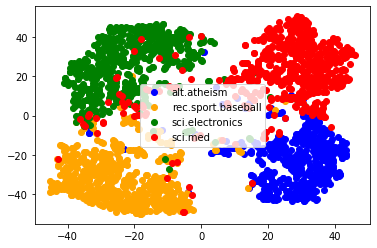

In [25]:
import matplotlib.pyplot as plt
#Results showing the seperation of documents my model was able to create based on the three overall topics each 
#document fell into
fig, axs = plt.subplots()
first_ind = np.array([], dtype=int)
second_ind = np.array([], dtype=int)
third_ind = np.array([], dtype=int)
fourth_ind = np.array([], dtype=int)
for i in range(0, len(corpus1)):
    first_ind = np.append(first_ind, int(i))
for i in range(len(corpus1), len(corpus1) + len(corpus2)):
    second_ind = np.append(second_ind, int(i))
for i in range(len(corpus1) + len(corpus2), len(corpus1) + len(corpus2) + len(corpus3)):
    third_ind = np.append(third_ind, int(i))
for i in range(len(corpus1) + len(corpus2) + len(corpus3), len(corpus1) + len(corpus2) + len(corpus3) + len(corpus4)):
    fourth_ind = np.append(fourth_ind, int(i))
axs.plot(viz[first_ind, 0], viz[first_ind, 1], color = "blue", marker='o', linestyle='', label='alt.atheism')
axs.plot(viz[second_ind, 0], viz[second_ind, 1], color = "orange", marker='o', linestyle='', label='rec.sport.baseball')
axs.plot(viz[third_ind, 0], viz[third_ind, 1], color = "green", marker='o', linestyle='',label='sci.electronics')
axs.plot(viz[fourth_ind, 0], viz[fourth_ind, 1], color = "red", marker='o', linestyle='',label='sci.med')
axs.legend()
plt.show()

In [26]:
word_embeddings = np.array([])
count = 0
for word in vocabulary:
    if count is 0:
        word_embeddings = np.array([word2vec[word]])
    else:
        word_embeddings = np.append(word_embeddings, np.array([word2vec[word]]), axis=0)
    count += 1
    print(count)

/Users/sanketmanjesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/Users/sanketmanjesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307


3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978


5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731


In [30]:
tsne2 = manifold.TSNE(perplexity=15)
viz2 = tsne2.fit_transform(word_embeddings)

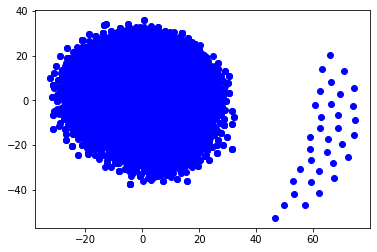

In [31]:
plt.scatter(viz2[:, 0], viz2[:, 1], color = "blue", marker='o')